# Proyecto Final



In [5]:

"""!pip install pandas
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install seaborn"""


'!pip install pandas\n!pip install nltk\n!pip install matplotlib\n!pip install wordcloud\n!pip install seaborn'

## Import libraries

In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter


[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import data as pandas dataframes

In [7]:
df_raw_p= pd.read_csv('../data/raw/Putin_Tweets.csv', )
df_raw_p.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Free Syrian Memes,@FreeSyrianMemes,2022-01-01T22:26:19.000Z,Free Syrian Memes\n@FreeSyrianMemes\n·\nJan 1,"Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35",0,0,3,35,['https://pbs.twimg.com/media/FIDMAkeXsAcBOwG?format=jpg&name=small'],https://twitter.com/FreeSyrianMemes/status/1477405855578570761
1,ciciu,@_ciciulena,2022-01-01T20:42:30.000Z,ciciu\n@_ciciulena\n·\nJan 1,PUTIN?????????? #CIAO2021\n1\n2\n38,0,1,2,38,[],https://twitter.com/_ciciulena/status/1477379730525536263
2,TOM,@lonestarmoocher,2022-01-01T19:12:05.000Z,TOM\n@lonestarmoocher\n·\nJan 1,Looks like Lumpy had a meeting with Putin.\n10\n10\n56,0,10,10,56,['https://pbs.twimg.com/media/FICgVy4VgAMHEqH?format=jpg&name=small'],https://twitter.com/lonestarmoocher/status/1477356976250126336
3,Tom London,@TomLondon6,2022-01-01T22:39:56.000Z,Tom London\n@TomLondon6\n·\nJan 1,"What kind of country honours war criminals, like Blair\nAnd imprisons a man for publishing evidence of war crimes, like Assange?\n\nPutin’s Russia?\nXi’s China?\n\nNo, this repressive, tinpot country, the UK\n9\n218\n813",0,9,218,813,[],https://twitter.com/TomLondon6/status/1477409281993494531
4,Ukemonde,@ukemonde,2022-01-01T22:02:54.000Z,Ukemonde\n@ukemonde\n·\nJan 1,"Time for a putin tribunal!!\nQuote Tweet\nMichael MacKay\n@mhmck\n · Jan 1\nWhen Russian-occupied Ukraine, Georgia and Moldova are liberated Putin’s War will end. As long as the Russian regime of state terrorism is appeased the war in Europe will continue and expand.\n7\n16",0,0,7,16,"['https://pbs.twimg.com/media/FIDHb0SXMAcqHoh?format=jpg&name=small', 'https://pbs.twimg.com/profile_images/1513598405662187527/37NBzG-n_normal.jpg']",https://twitter.com/ukemonde/status/1477399960547172353


In [8]:
df_raw_z= pd.read_csv('../data/raw/Zelensky_Tweets.csv')
df_raw_z.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,HillReporter.com,@HillReporter,2022-01-01T00:22:02.000Z,HillReporter.com\n@HillReporter\n·\nJan 1,"President Biden Says He ‘Made It Clear’ to Putin That Russia ‘Cannot Move On’ Ukraine, Will Speak With Zelensky\nhillreporter.com\nPresident Biden Says He 'Made It Clear' to Putin That Russia 'Cannot Move On' Ukraine, Will Speak...\nPresident Joe Biden said on Friday he made it clear to Russian President Vladimir Putin during their call a day earlier that he cannot “move on Ukraine.” President Biden said Friday he told Putin...\n13\n148\n701",0,13,148,701,['https://pbs.twimg.com/card_img/1546966415911129088/VBGIHWj3?format=jpg&name=small'],https://twitter.com/HillReporter/status/1477072590514446336
1,Stars and Stripes,@starsandstripes,2022-01-01T06:18:00.000Z,Stars and Stripes\n@starsandstripes\n·\nJan 1,"Following his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military buildup near its border with Ukraine.\nstripes.com\nBiden to speak with Ukraine president amid fears that Russia may once again invade Ukraine\nFollowing his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military...\n6\n9\n29",0,6,9,29,['https://pbs.twimg.com/card_img/1547334080676741121/cniV4Jyh?format=jpg&name=small'],https://twitter.com/starsandstripes/status/1477162169531879426
2,Jamie Fly,@jamiemfly,2022-01-01T14:58:22.000Z,Jamie Fly\n@jamiemfly\n·\nJan 1,"Thanks to \n@ZelenskyyUa\n for calling for the return of all prisoners illegally detained in #Crimea including \n@RFERL\n @radiosvoboda\n @krymrealii\n's Vladyslav Yesypenko in his New Year's address #FreeYesypenko #JournalismIsNotACrime\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n9\n31",0,0,9,31,[],https://twitter.com/jamiemfly/status/1477293126666670085
3,Ivan Katchanovski,@I_Katchanovski,2022-01-01T19:26:23.000Z,Ivan Katchanovski\n@I_Katchanovski\n·\nJan 1,"#Zelensky in New Year greeting lavishly praises & showcases #farright Right Sector leadership member & Right Sector volunteer units at 8:03-23, 9:15-17, 12:39-48, 15:40-43, 16:30-17:12 & 20:46-47. He points out him & his Hero of Ukraine award at 16:38-45.\nyoutube.com\nПрезидент України Володимир Зеленський вітає з Новим роком.\n«Будують, творять і захищають Україну надзвичайні люди» – вітання з Новим роком від Президента Володимира Зеленського.\n1\n9\n21",0,1,9,21,[],https://twitter.com/I_Katchanovski/status/1477360573717352455
4,M. K. Bhadrakumar,@BhadraPunchline,2022-01-01T17:53:48.000Z,M. K. Bhadrakumar\n@BhadraPunchline\n·\nJan 1,"Zelensky: ""No army on the other side of the border frightens us, because a great army on our side of the border protects us... We can say we have returned Crimea to the global agenda so that one day we can say we have returned Crimea to Ukraine...\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n4\n4\n7",0,4,4,7,[],https://twitter.com/BhadraPunchline/status/1477337274975088641


In [9]:
df_raw_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10737 entries, 0 to 10736
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  10717 non-null  object
 1   UserName        10737 non-null  object
 2   Timestamp       10737 non-null  object
 3   Text            10737 non-null  object
 4   Embedded_text   10737 non-null  object
 5   Emojis          10737 non-null  object
 6   Comments        10737 non-null  object
 7   Likes           10737 non-null  object
 8   Retweets        10737 non-null  object
 9   Image link      10737 non-null  object
 10  Tweet URL       10737 non-null  object
dtypes: object(11)
memory usage: 922.8+ KB


In [10]:
df_raw_p.describe()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
count,10717,10737,10737,10737,10737,10737,10737,10737,10737,10737,10737
unique,7893,8027,10551,10340,10737,1240,272,531,956,4523,10734
top,Mannerheim,@WarAgainstPutin,2022-03-06T23:57:26.000Z,Stefan Resists Putin\n@StefanK1117\n·\nJul 15,"Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35",0,0,0,5,[],https://twitter.com/evanmcmurry/status/1494821119446204423
freq,49,49,3,8,1,8350,3106,1812,551,5874,2


In [11]:
df_raw_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11170 entries, 0 to 11169
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  11151 non-null  object
 1   UserName        11170 non-null  object
 2   Timestamp       11170 non-null  object
 3   Text            11170 non-null  object
 4   Embedded_text   11170 non-null  object
 5   Emojis          11170 non-null  object
 6   Comments        11170 non-null  object
 7   Likes           11170 non-null  object
 8   Retweets        11170 non-null  object
 9   Image link      11170 non-null  object
 10  Tweet URL       11170 non-null  object
dtypes: object(11)
memory usage: 960.0+ KB


In [12]:
df_raw_z.describe()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
count,11151,11170,11170,11170,11170,11170,11170,11170,11170,11170,11170
unique,8025,8184,11110,10518,11142,1398,276,555,945,3337,11167
top,The Kyiv Independent,@KyivIndependent,2022-03-16T23:44:05.000Z,VAXXED THO\n@rogue_corq\n·\nJul 13,Replying to \n@tugatripeira\n and \n@ZelenskyyUa\nBlessed be\n1\n1\n3,0,0,0,1,[],https://twitter.com/ChinasCanada/status/1548397512515411969
freq,73,73,3,8,5,8339,5486,5423,1540,7489,3


## Transform df

Make a copy of the raw dataset. 

The first step is to select the columns that we consider relevant for now.

In [13]:
df_interim_p = df_raw_p.copy()

In [14]:
df_interim_p.drop(columns=['UserScreenName',"Text", "Emojis","Image link"], axis=1, inplace=True)

In [15]:
df_interim_p.sample(5, random_state=123)

,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,Tweet URL
10112,@stuartpstevens,2022-07-12T12:14:43.000Z,"It’s not just Putin. There is a deep sickness in Russian society. They have failed every chance to become a civilized country and remain a gangster state that excels only in destruction, murder, oppression. Maybe there’s a path to change but until then they must be defeated.\nQuote Tweet\nMark Hertling\n@MarkHertling\n · Jul 12\nThe Russians are scum. twitter.com/visegrad24/sta…\n53\n277",0,53,277,https://twitter.com/stuartpstevens/status/1546830411900280833
3191,@AirAssets,2022-03-06T23:55:34.000Z,For everyone hating the Ukraine invasion but profiting off of it shame on you...you are feeding Putin with high oil prices we hurt him most when fuel was down\n3\n3\n9,3,3,9,https://twitter.com/AirAssets/status/1500621137843265542
628,@SBWheat1,2022-01-15T23:34:38.000Z,"#TrumpRally \n\nDefeated 45 had 4 years to ""Make America Great Again"" and ""Save America""\n\nHe gave tax cuts to the rich\n\nHe wrote love letters to Kim Jong-un\n\nPutin played him like a fiddle\n\nHe was impeached twice\n\nHe incited & conspired an insurrection\n\nHE LOST BY 7 MILLION VOTES\n176\n913\n2,793",176,913,"2,793",https://twitter.com/SBWheat1/status/1482496478404911111
1473,JamesLaMancusa@commongoodunited.com,2022-02-01T23:39:51.000Z,"Exactly! Putin/Russia stole Crimea (critical port), & now he's making his next move to expand their tentacles into to E Euro region (Ukraine borders 7 nations) & take over coastal area of Black Sea & Sea of Azov. Putin's a vulture like DJT who said Venezuela is ripe for US taking\nQuote Tweet\nKhashoggi’s Ghost\n@UROCKlive1\n · Feb 1\nDealing with Vladimir Putin is a lot like dealing with Republicans. It has to be done, but it's never a valid negotiation because none of them are ever acting in good faith.\n\nThey all lie. They all gaslight. They're all cheating. And they're all offended when you point this out.\n10\n16",0,10,16,https://twitter.com/JamesLamancusa/status/1488658384308125696
372,@starsandstripes,2022-01-08T23:59:00.000Z,"To Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\nstripes.com\nPutin dreams of a Russian 'sphere of influence.' Kazakhstan's protesters are the latest to push...\nTo Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\n3\n14\n19",3,14,19,https://twitter.com/starsandstripes/status/1479965894096965637


In [16]:
df_interim_z = df_raw_z.copy()

In [17]:
df_interim_z.drop(columns=['UserScreenName',"Text", "Emojis","Image link"], axis=1, inplace=True)

In [18]:
df_interim_z.sample(5, random_state=123)

,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,Tweet URL
9942,@HighgateRobin,2022-07-09T20:00:55.000Z,"Replying to \n@BrotherNumpsay\n and \n@KyivIndependent\nFrom my readings about Ukraine, it seems like half the officeholders were loyal to Russia or being paid by Russia for Ukrainian intel, even top people in its secret service. I think the US is giving Zelensky the dirt that they have on his people.\n5\n22\n421",5,22,421,https://twitter.com/HighgateRobin/status/1545860569177079809
9396,@juaninf09349964,2022-07-02T23:56:48.000Z,Replying to \n@Roj0Santo\n @gabrielboric\n and \n@ZelenskyyUa\nCandy candy? Por lo meretriz? \n1\n5,1,0,5,https://twitter.com/juaninf09349964/status/1543383219554467842
1976,@Elenamirko7,2022-02-08T13:29:20.000Z,Replying to \n@Aliaktann07\n @ZelenskyyUa\n and \n@EmmanuelMacron\nHe is not our friend.\n1\n2,1,0,2,https://twitter.com/Elenamirko7/status/1491041458010615818
7067,@HIRH,2022-05-21T21:59:10.000Z,"Replying to \n@ZelenskyyUa\n and \n@POTUS\nThank you both for showing up for the civilians whose lives are ruined by Putin’s disgusting violent grab for power & land. It’s not just you, it’s the world he’s after & we see him for what he is. #VladTheToxic #SlavaUkraini I my cousins are safe. \n1",0,0,1,https://twitter.com/HIRH/status/1528133324249628673
7412,@Dante__09,2022-05-28T21:42:10.000Z,"Replying to \n@BorisJohnson\n and \n@ZelenskyyUa\nAlthough it’s horrible what is happening in Ukraine. You do realise that, by selling arms to Ukraine, the U.K will be targeted.\n\nPutin has threatened the U.K, Johnson. Saying if you interfere, the U.K will see nuclear missiles.\n4\n4",4,0,4,https://twitter.com/Dante__09/status/1530665760460251138


Previously we could see that all the columns are of the object data type.
- The "Time Stamp" column should be datetime.
- The Retweets, Likes and Comments columns should be numeric.

In [19]:
df_interim_p['Timestamp'] = df_interim_p['Timestamp'].astype('datetime64')

Some of the records contain commas and letters, so we must remove these characters to transform them to numbers.

In [20]:
df_interim_p['Comments'] = df_interim_p['Comments'].str.replace(',', '').astype('int64')
df_interim_p['Likes'] = df_interim_p['Likes'].str.replace(',', '').replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype('int64')
df_interim_p['Retweets'] = df_interim_p['Retweets'].str.replace(',', '').replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype('int64')

In [21]:
df_interim_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10737 entries, 0 to 10736
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       10737 non-null  object        
 1   Timestamp      10737 non-null  datetime64[ns]
 2   Embedded_text  10737 non-null  object        
 3   Comments       10737 non-null  int64         
 4   Likes          10737 non-null  int64         
 5   Retweets       10737 non-null  int64         
 6   Tweet URL      10737 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 587.3+ KB


In [22]:
df_interim_z['Timestamp'] = df_interim_z['Timestamp'].astype('datetime64')

In [23]:
df_interim_z['Comments'] = df_interim_z['Comments'].str.replace(',', '').astype('int64')
df_interim_z['Likes'] = df_interim_z['Likes'].str.replace(',', '').replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype('int64')
df_interim_z['Retweets'] = df_interim_z['Retweets'].str.replace(',', '').replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype('int64')

In [24]:
df_interim_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11170 entries, 0 to 11169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       11170 non-null  object        
 1   Timestamp      11170 non-null  datetime64[ns]
 2   Embedded_text  11170 non-null  object        
 3   Comments       11170 non-null  int64         
 4   Likes          11170 non-null  int64         
 5   Retweets       11170 non-null  int64         
 6   Tweet URL      11170 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 611.0+ KB


In [25]:
df_interim_p.sample(5, random_state=123)

,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,Tweet URL
10112,@stuartpstevens,2022-07-12 12:14:43,"It’s not just Putin. There is a deep sickness in Russian society. They have failed every chance to become a civilized country and remain a gangster state that excels only in destruction, murder, oppression. Maybe there’s a path to change but until then they must be defeated.\nQuote Tweet\nMark Hertling\n@MarkHertling\n · Jul 12\nThe Russians are scum. twitter.com/visegrad24/sta…\n53\n277",0,53,277,https://twitter.com/stuartpstevens/status/1546830411900280833
3191,@AirAssets,2022-03-06 23:55:34,For everyone hating the Ukraine invasion but profiting off of it shame on you...you are feeding Putin with high oil prices we hurt him most when fuel was down\n3\n3\n9,3,3,9,https://twitter.com/AirAssets/status/1500621137843265542
628,@SBWheat1,2022-01-15 23:34:38,"#TrumpRally \n\nDefeated 45 had 4 years to ""Make America Great Again"" and ""Save America""\n\nHe gave tax cuts to the rich\n\nHe wrote love letters to Kim Jong-un\n\nPutin played him like a fiddle\n\nHe was impeached twice\n\nHe incited & conspired an insurrection\n\nHE LOST BY 7 MILLION VOTES\n176\n913\n2,793",176,913,2793,https://twitter.com/SBWheat1/status/1482496478404911111
1473,JamesLaMancusa@commongoodunited.com,2022-02-01 23:39:51,"Exactly! Putin/Russia stole Crimea (critical port), & now he's making his next move to expand their tentacles into to E Euro region (Ukraine borders 7 nations) & take over coastal area of Black Sea & Sea of Azov. Putin's a vulture like DJT who said Venezuela is ripe for US taking\nQuote Tweet\nKhashoggi’s Ghost\n@UROCKlive1\n · Feb 1\nDealing with Vladimir Putin is a lot like dealing with Republicans. It has to be done, but it's never a valid negotiation because none of them are ever acting in good faith.\n\nThey all lie. They all gaslight. They're all cheating. And they're all offended when you point this out.\n10\n16",0,10,16,https://twitter.com/JamesLamancusa/status/1488658384308125696
372,@starsandstripes,2022-01-08 23:59:00,"To Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\nstripes.com\nPutin dreams of a Russian 'sphere of influence.' Kazakhstan's protesters are the latest to push...\nTo Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\n3\n14\n19",3,14,19,https://twitter.com/starsandstripes/status/1479965894096965637


In [26]:
df_interim_z.sample(5, random_state=123)

,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,Tweet URL
9942,@HighgateRobin,2022-07-09 20:00:55,"Replying to \n@BrotherNumpsay\n and \n@KyivIndependent\nFrom my readings about Ukraine, it seems like half the officeholders were loyal to Russia or being paid by Russia for Ukrainian intel, even top people in its secret service. I think the US is giving Zelensky the dirt that they have on his people.\n5\n22\n421",5,22,421,https://twitter.com/HighgateRobin/status/1545860569177079809
9396,@juaninf09349964,2022-07-02 23:56:48,Replying to \n@Roj0Santo\n @gabrielboric\n and \n@ZelenskyyUa\nCandy candy? Por lo meretriz? \n1\n5,1,0,5,https://twitter.com/juaninf09349964/status/1543383219554467842
1976,@Elenamirko7,2022-02-08 13:29:20,Replying to \n@Aliaktann07\n @ZelenskyyUa\n and \n@EmmanuelMacron\nHe is not our friend.\n1\n2,1,0,2,https://twitter.com/Elenamirko7/status/1491041458010615818
7067,@HIRH,2022-05-21 21:59:10,"Replying to \n@ZelenskyyUa\n and \n@POTUS\nThank you both for showing up for the civilians whose lives are ruined by Putin’s disgusting violent grab for power & land. It’s not just you, it’s the world he’s after & we see him for what he is. #VladTheToxic #SlavaUkraini I my cousins are safe. \n1",0,0,1,https://twitter.com/HIRH/status/1528133324249628673
7412,@Dante__09,2022-05-28 21:42:10,"Replying to \n@BorisJohnson\n and \n@ZelenskyyUa\nAlthough it’s horrible what is happening in Ukraine. You do realise that, by selling arms to Ukraine, the U.K will be targeted.\n\nPutin has threatened the U.K, Johnson. Saying if you interfere, the U.K will see nuclear missiles.\n4\n4",4,0,4,https://twitter.com/Dante__09/status/1530665760460251138


In [27]:
df_interim_p.describe()

,Comments,Likes,Retweets
count,10737.000000,10737.000000,10737.000000
mean,13.565614,54.280339,231.704946
std,112.524658,400.041898,1734.748321
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000
50%,1.000000,3.000000,16.000000
75%,4.000000,12.000000,47.000000
max,5356.000000,16400.000000,66100.000000


In [28]:
df_interim_z.describe()

,Comments,Likes,Retweets
count,11170.000000,11170.000000,11170.000000
mean,12.313339,65.628201,330.624978
std,103.798338,1055.005784,6184.822205
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,1.000000,1.000000,5.000000
75%,2.000000,6.000000,28.000000
max,4698.000000,103900.000000,620000.000000


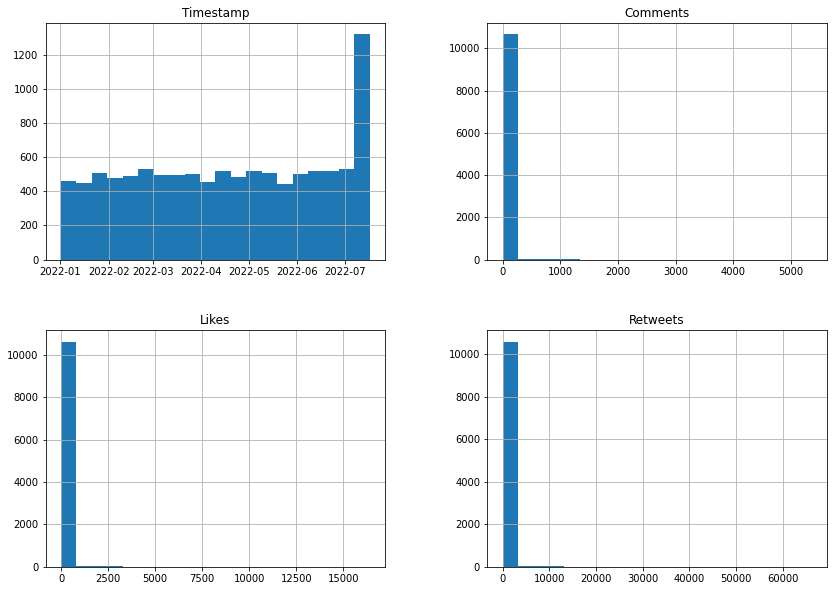

In [29]:
df_interim_p.hist(figsize=(14,10), bins=20)
plt.show()

In [30]:
len(df_interim_p['Comments'].loc[df_interim_p['Comments'] > 2])

3862

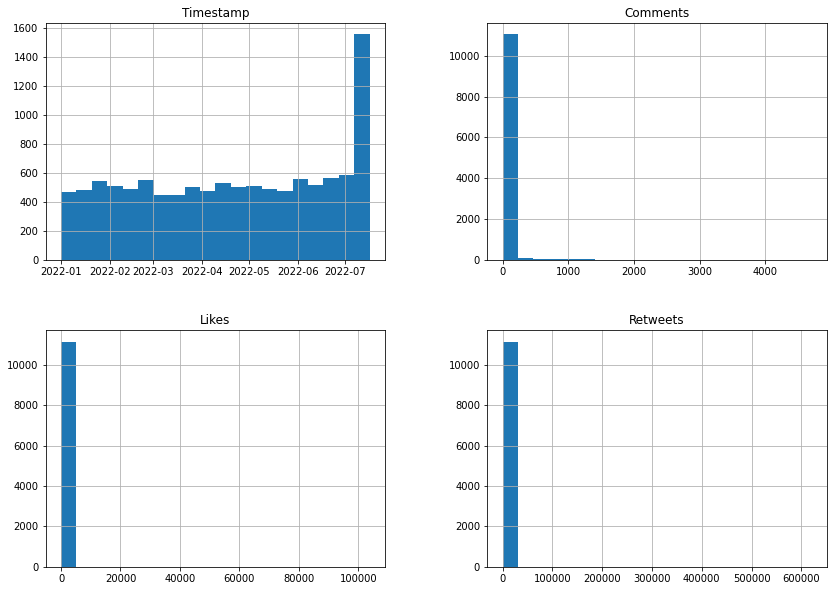

In [31]:
df_interim_z.hist(figsize=(14,10), bins=20)
plt.show()

In [32]:
len(df_interim_z['Comments'].loc[df_interim_z['Comments'] > 1000])

16

We renamed the column "Embedded_Text" to make it more clear.

In [33]:
df_interim_p.rename(columns = {'Embedded_text':'Tweet'}, inplace = True)

In [34]:
df_interim_p.head()

,UserName,Timestamp,Tweet,Comments,Likes,Retweets,Tweet URL
0,@FreeSyrianMemes,2022-01-01 22:26:19,"Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35",0,3,35,https://twitter.com/FreeSyrianMemes/status/1477405855578570761
1,@_ciciulena,2022-01-01 20:42:30,PUTIN?????????? #CIAO2021\n1\n2\n38,1,2,38,https://twitter.com/_ciciulena/status/1477379730525536263
2,@lonestarmoocher,2022-01-01 19:12:05,Looks like Lumpy had a meeting with Putin.\n10\n10\n56,10,10,56,https://twitter.com/lonestarmoocher/status/1477356976250126336
3,@TomLondon6,2022-01-01 22:39:56,"What kind of country honours war criminals, like Blair\nAnd imprisons a man for publishing evidence of war crimes, like Assange?\n\nPutin’s Russia?\nXi’s China?\n\nNo, this repressive, tinpot country, the UK\n9\n218\n813",9,218,813,https://twitter.com/TomLondon6/status/1477409281993494531
4,@ukemonde,2022-01-01 22:02:54,"Time for a putin tribunal!!\nQuote Tweet\nMichael MacKay\n@mhmck\n · Jan 1\nWhen Russian-occupied Ukraine, Georgia and Moldova are liberated Putin’s War will end. As long as the Russian regime of state terrorism is appeased the war in Europe will continue and expand.\n7\n16",0,7,16,https://twitter.com/ukemonde/status/1477399960547172353


In [35]:
df_interim_z.rename(columns = {'Embedded_text':'Tweet'}, inplace = True)

In [36]:
df_interim_z.head()

,UserName,Timestamp,Tweet,Comments,Likes,Retweets,Tweet URL
0,@HillReporter,2022-01-01 00:22:02,"President Biden Says He ‘Made It Clear’ to Putin That Russia ‘Cannot Move On’ Ukraine, Will Speak With Zelensky\nhillreporter.com\nPresident Biden Says He 'Made It Clear' to Putin That Russia 'Cannot Move On' Ukraine, Will Speak...\nPresident Joe Biden said on Friday he made it clear to Russian President Vladimir Putin during their call a day earlier that he cannot “move on Ukraine.” President Biden said Friday he told Putin...\n13\n148\n701",13,148,701,https://twitter.com/HillReporter/status/1477072590514446336
1,@starsandstripes,2022-01-01 06:18:00,"Following his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military buildup near its border with Ukraine.\nstripes.com\nBiden to speak with Ukraine president amid fears that Russia may once again invade Ukraine\nFollowing his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military...\n6\n9\n29",6,9,29,https://twitter.com/starsandstripes/status/1477162169531879426
2,@jamiemfly,2022-01-01 14:58:22,"Thanks to \n@ZelenskyyUa\n for calling for the return of all prisoners illegally detained in #Crimea including \n@RFERL\n @radiosvoboda\n @krymrealii\n's Vladyslav Yesypenko in his New Year's address #FreeYesypenko #JournalismIsNotACrime\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n9\n31",0,9,31,https://twitter.com/jamiemfly/status/1477293126666670085
3,@I_Katchanovski,2022-01-01 19:26:23,"#Zelensky in New Year greeting lavishly praises & showcases #farright Right Sector leadership member & Right Sector volunteer units at 8:03-23, 9:15-17, 12:39-48, 15:40-43, 16:30-17:12 & 20:46-47. He points out him & his Hero of Ukraine award at 16:38-45.\nyoutube.com\nПрезидент України Володимир Зеленський вітає з Новим роком.\n«Будують, творять і захищають Україну надзвичайні люди» – вітання з Новим роком від Президента Володимира Зеленського.\n1\n9\n21",1,9,21,https://twitter.com/I_Katchanovski/status/1477360573717352455
4,@BhadraPunchline,2022-01-01 17:53:48,"Zelensky: ""No army on the other side of the border frightens us, because a great army on our side of the border protects us... We can say we have returned Crimea to the global agenda so that one day we can say we have returned Crimea to Ukraine...\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n4\n4\n7",4,4,7,https://twitter.com/BhadraPunchline/status/1477337274975088641


In [37]:
df_interim_p.sort_values(by = 'Likes', ascending = False)[['UserName','Tweet', 'Likes']][:10]

,UserName,Tweet,Likes
3805,@OccupyDemocrats,"BREAKING NEWS: In a major loss for Putin, NATO announces that it is sending an air defense system to Ukraine in order to help it fight off Russia’s bomber jets. RT TO THANK NATO FOR STANDING WITH UKRAINE!\n983\n16.4K\n54.8K",16400
6538,@DanRather,"If you are voting against aid for Ukraine, or you excuse away Putin’s murderous aggression, it might be a small tip off to what you really think of freedom and democracy.\n4,473\n13.9K\n66.1K",13900
4164,@davenewworld_2,Russians against Putin are waving a new flag without the red stripe to symbolize the removal of blood from the flag. This is a trend Putin won't want going viral in Russia.\n446\n11.4K\n36.5K,11400
6800,@TimothyDSnyder,"It is senseless to shelter Putin from the sense that he is losing. He will figure that out for himself, and he will act to protect himself. 1/17\n630\n11.3K\n36.7K",11300
4311,@atrupar,"Trump calls for Putin to release dirt on the Biden family right now since now ""he's not exactly a fan of our country"" during new interview with Real America's Voice\n5,356\n8,504\n15.5K",8504
4507,@LatestAnonPress,"It looks like scenes from a horror movie. But it is not!\nThis is the result of the murders of hundreds of civilians by Russian soldiers in Ukraine, in the town of #Bucha near #Kyiv.\n\nPUTIN NEEDS TO BE STOPPED NOW!\nThe following media includes potentially sensitive content. Change settings\nView\n956\n8,245\n22.8K",8245
5477,@POTUS,"As Russia continues to grind out brutalities against Ukraine, Putin is banking on us losing interest. He is betting that Western unity will crack.\n \nOnce again, we will prove him wrong.\n4,050\n7,985\n46K",7985
2439,@joncoopertweets,"President Biden’s steadfast broadcasting of Putin’s every move might be one of the savviest war-avoidance moves made by a president in a generation.\n1,525\n7,971\n55.3K",7971
10178,@JackPosobiec,"Did John Bolton realize he just publicly admitted the US does coups around the world - like Putin has been saying all along?\n896\n7,336\n29.5K",7336
9634,@JayinKyiv,"Warning on cigs in Ukraine now says you should quit smoking so you get to see how Putin dies.\n254\n6,177\n31.9K",6177


In [38]:
df_interim_p.sort_values(by = 'Retweets', ascending = False)[['UserName','Tweet', 'Retweets']][:10]

,UserName,Tweet,Retweets
6538,@DanRather,"If you are voting against aid for Ukraine, or you excuse away Putin’s murderous aggression, it might be a small tip off to what you really think of freedom and democracy.\n4,473\n13.9K\n66.1K",66100
2439,@joncoopertweets,"President Biden’s steadfast broadcasting of Putin’s every move might be one of the savviest war-avoidance moves made by a president in a generation.\n1,525\n7,971\n55.3K",55300
3805,@OccupyDemocrats,"BREAKING NEWS: In a major loss for Putin, NATO announces that it is sending an air defense system to Ukraine in order to help it fight off Russia’s bomber jets. RT TO THANK NATO FOR STANDING WITH UKRAINE!\n983\n16.4K\n54.8K",54800
5477,@POTUS,"As Russia continues to grind out brutalities against Ukraine, Putin is banking on us losing interest. He is betting that Western unity will crack.\n \nOnce again, we will prove him wrong.\n4,050\n7,985\n46K",46000
6800,@TimothyDSnyder,"It is senseless to shelter Putin from the sense that he is losing. He will figure that out for himself, and he will act to protect himself. 1/17\n630\n11.3K\n36.7K",36700
4164,@davenewworld_2,Russians against Putin are waving a new flag without the red stripe to symbolize the removal of blood from the flag. This is a trend Putin won't want going viral in Russia.\n446\n11.4K\n36.5K,36500
2755,@IAPonomarenko,"What’s happening now in Ukraine is absolutely unthinkable.\nAnd I still don’t get it why Russians obey Putin’s absolutely psychopathic orders.\n906\n5,185\n36.4K",36400
9634,@JayinKyiv,"Warning on cigs in Ukraine now says you should quit smoking so you get to see how Putin dies.\n254\n6,177\n31.9K",31900
10178,@JackPosobiec,"Did John Bolton realize he just publicly admitted the US does coups around the world - like Putin has been saying all along?\n896\n7,336\n29.5K",29500
6481,@McFaul,"I wish we were hearing more outrage from leaders in the Middle East and Africa about how Putin is showing zero concern about food supplies to your countries. Zero.\n710\n5,507\n29.4K",29400


In [39]:
df_interim_p.sort_values(by = 'Comments', ascending = False)[['UserName','Tweet', 'Comments']][:10]

,UserName,Tweet,Comments
4311,@atrupar,"Trump calls for Putin to release dirt on the Biden family right now since now ""he's not exactly a fan of our country"" during new interview with Real America's Voice\n5,356\n8,504\n15.5K",5356
8888,@POTUS,"We could have turned a blind eye to Putin’s barbaric war against Ukraine and the price of gas wouldn’t have spiked the way it has, but America rose to the moment.\n\nWe proudly stand with Ukraine.\n5,165\n3,446\n17.6K",5165
6538,@DanRather,"If you are voting against aid for Ukraine, or you excuse away Putin’s murderous aggression, it might be a small tip off to what you really think of freedom and democracy.\n4,473\n13.9K\n66.1K",4473
5477,@POTUS,"As Russia continues to grind out brutalities against Ukraine, Putin is banking on us losing interest. He is betting that Western unity will crack.\n \nOnce again, we will prove him wrong.\n4,050\n7,985\n46K",4050
3952,@joncoopertweets,"I’m curious. On a scale of 1 to 10, how badly do you want Putin's invasion of Ukraine to end up being the most historical embarrassment Russia has ever initiated?\n2,821\n1,767\n18.6K",2821
6996,@AnonOpsSE,"Looks like Putin has start wearing bulletproof vest.\n1,729\n4,413\n23.8K",1729
2439,@joncoopertweets,"President Biden’s steadfast broadcasting of Putin’s every move might be one of the savviest war-avoidance moves made by a president in a generation.\n1,525\n7,971\n55.3K",1525
949,@B52Malmet,"Does Tucker Carlson have a soft spot for Vladimir Putin?\n1,294\n750\n5,487",1294
541,@marcorubio,"It is now almost certain that Putin will attempt to occupy at least parts of Ukraine very soon\n1,290\n486\n1,735",1290
4003,@JustinTrudeau,"Sat down with Prime Minister \n@MarinSanna\n this afternoon. We’re united against Putin’s attack on Ukraine, and in support of the Ukrainian people. And we’ll keep working together to coordinate our ongoing response and to advance our shared priorities – such as climate change.\n1,109\n313\n2,084",1109


In [40]:
df_interim_z.sort_values(by = 'Likes', ascending = False)[['UserName','Tweet', 'Likes']][:10]

,UserName,Tweet,Likes
2882,@BenjaminRamm,"During his inaugural address in 2019, Zelensky told lawmakers: “I do not want my picture in your offices: the President is not an icon, an idol or a portrait. Hang your kids' photos instead, and look at them each time you are making a decision.”\n3,335\n103.9K\n620K",103900
2723,@antontroian,"Zelensky addressing the Russian people in Russian now: \n“Today I initiated a phone call with the president of the Russian Federation. The result was silence, though the silence should be in the Donbas. As a result I want to address all citizens of Russia…\n269\n10.7K\n29.8K",10700
4028,@KyivIndependent,"Zelensky to Russian pilots:\n\n""I want to repeat once again to all Russian pilots who do not think about the orders they carry out: Killing civilians is a crime, and you will pay,"" Zelensky said. ""Today or tomorrow is less important. The main thing is that it's inevitable.""\n352\n9,922\n49.3K",9922
4606,@ChristopherJM,"Powerful, passionate address from Zelensky tonight. Switching from Ukrainian to Russian he addresses mothers of soldiers who committed horrific war crimes in Bucha, Irpin, Hostomel, asking how they raised “butchers,” and he tells Moscow to see how it’s orders are being fulfilled.\n604\n9,811\n27.7K",9811
3542,@joshscampbell,"Still stunning in hindsight...\n\nZelensky: ""We are ready to continue to cooperate for the next steps, specifically we are almost ready to buy more Javelins from the United States for defense purposes.""\n\nTrump: ""I would like you to do us a favor though...""\ncnn.com\nRead Trump's phone conversation with Volodymyr Zelensky | CNN Politics\nPresident Donald Trump repeatedly pushed for Ukrainian President Volodymr Zelensky to investigate former Vice President Joe Biden, and his son, Hunter, during a July 25 phone call, according to a...\n584\n8,565\n24.2K",8565
1529,@Jim_Jordan,"Why isn’t the media demanding that President Biden release the transcript of his call with President Zelensky? \n\nWhat happened to transparency?\n\nOr does that only matter when President Trump is in office?\n4,276\n8,113\n33.4K",8113
3181,@BrianKarem,"NOW: Ukrainian President Zelensky releases a video statement to counter Russian propaganda that he's fled his country.\n474\n7,134\n49.2K",7134
5427,@KyivIndependent,"Zelensky: 'If we had access to all the weapons we need, which our partners have, we would have already ended this war.' \n\nZelensky renewed calls for weapons to Ukraine, saying “it is unfair that Ukraine is still forced to ask for what its partners have been storing for years.”\n701\n6,647\n31.1K",6647
6140,@KyivIndependent,"Zelensky: Ukraine seeks full restoration of territory, including Crimea. \n\nSpeaking at the WSJ's CEO Council Summit on May 3, President Zelensky said Ukraine's goals are to halt Russia’s advance, reclaim territory, and to restore Ukraine’s entire territory through diplomacy.\n706\n6,453\n37.1K",6453
5555,@DAlperovitch,"Zelensky throwing serious shade tonight:\n“You know they (Russians) used to talk about their biggest dream: to see Paris and die… their dream now is to steal a toilet and die""\n329\n5,829\n26.2K",5829


In [41]:
df_interim_z.sort_values(by = 'Retweets', ascending = False)[['UserName','Tweet', 'Retweets']][:10]

,UserName,Tweet,Retweets
2882,@BenjaminRamm,"During his inaugural address in 2019, Zelensky told lawmakers: “I do not want my picture in your offices: the President is not an icon, an idol or a portrait. Hang your kids' photos instead, and look at them each time you are making a decision.”\n3,335\n103.9K\n620K",620000
7830,@ZelenskyyUa,"Congratulations on the Platinum anniversary of the reign of the Queen of Her Majesty Elizabeth II \n@RoyalFamily\n. Grateful for supporting in the fight for our freedom and independence. I wish Her Majesty well-being and peace and prosperity to people.\n1,006\n5,623\n65.9K",65900
4028,@KyivIndependent,"Zelensky to Russian pilots:\n\n""I want to repeat once again to all Russian pilots who do not think about the orders they carry out: Killing civilians is a crime, and you will pay,"" Zelensky said. ""Today or tomorrow is less important. The main thing is that it's inevitable.""\n352\n9,922\n49.3K",49300
3181,@BrianKarem,"NOW: Ukrainian President Zelensky releases a video statement to counter Russian propaganda that he's fled his country.\n474\n7,134\n49.2K",49200
6140,@KyivIndependent,"Zelensky: Ukraine seeks full restoration of territory, including Crimea. \n\nSpeaking at the WSJ's CEO Council Summit on May 3, President Zelensky said Ukraine's goals are to halt Russia’s advance, reclaim territory, and to restore Ukraine’s entire territory through diplomacy.\n706\n6,453\n37.1K",37100
9277,@ZelenskyyUa,"I commend US historic decision to provide UA with new security assistance package, including modern air defense systems. Thank you \n@POTUS\n for your continued leadership and support of UA in its fight against the aggressor. Together towards the victory!\n1,147\n4,899\n34.9K",34900
1529,@Jim_Jordan,"Why isn’t the media demanding that President Biden release the transcript of his call with President Zelensky? \n\nWhat happened to transparency?\n\nOr does that only matter when President Trump is in office?\n4,276\n8,113\n33.4K",33400
5427,@KyivIndependent,"Zelensky: 'If we had access to all the weapons we need, which our partners have, we would have already ended this war.' \n\nZelensky renewed calls for weapons to Ukraine, saying “it is unfair that Ukraine is still forced to ask for what its partners have been storing for years.”\n701\n6,647\n31.1K",31100
7186,@KyivIndependent,"Zelensky: 'Russia will also have to leave Crimea.' \n\nPresident Zelensky said during his daily address that Russia will also have to leave Kherson, Melitopol, Enerhodar, Mariupol, and ""all other cities and communities where they are still pretending to be the owners.”\n658\n5,148\n30.8K",30800
2723,@antontroian,"Zelensky addressing the Russian people in Russian now: \n“Today I initiated a phone call with the president of the Russian Federation. The result was silence, though the silence should be in the Donbas. As a result I want to address all citizens of Russia…\n269\n10.7K\n29.8K",29800


In [42]:
df_interim_z.sort_values(by = 'Comments', ascending = False)[['UserName','Tweet', 'Comments']][:10]

,UserName,Tweet,Comments
6085,@llambchops,"Zelensky posing with Pelosi and Schiff makes me wonder about him and this whole operation. \n\nWhat do you think? Are we being played?\n4,698\n3,026\n13.7K",4698
1529,@Jim_Jordan,"Why isn’t the media demanding that President Biden release the transcript of his call with President Zelensky? \n\nWhat happened to transparency?\n\nOr does that only matter when President Trump is in office?\n4,276\n8,113\n33.4K",4276
5215,@GodandtheBear,"Zelensky on tv saying we shouldn't be scared of nukes, we should be ready? Can anyone explain how you get ready to be nuked?\n3,546\n4,851\n29.7K",3546
9510,Jordan Schachtel @ dossier.substack.com,"Zelensky just said Ukraine is gonna need a cool $750 billion to keep his country running. \n3,446\n4,843\n18K",3446
2882,@BenjaminRamm,"During his inaugural address in 2019, Zelensky told lawmakers: “I do not want my picture in your offices: the President is not an icon, an idol or a portrait. Hang your kids' photos instead, and look at them each time you are making a decision.”\n3,335\n103.9K\n620K",3335
8513,@BorisJohnson,"Putin’s grand imperial design for the total reconquest of Ukraine has been derailed.\n\nThere are four vital steps we must take to strengthen the hand of our Ukrainian friends and ensure we finish this war on the terms that \n@ZelenskyyUa\n has laid out.\nthetimes.co.uk\nThe Times & The Sunday Times\nNews and opinion from The Times & The Sunday Times\n2,453\n2,319\n12.5K",2453
1896,@Acyn,"Jim Jordan, who is refusing to testify about his phone call with Trump, asks why won’t Biden release the transcript of his phone call with Zelensky and complains the elite left get to abide by a certain set of rules and “we regular folk got to follow another set”\n1,505\n1,105\n4,069",1505
3792,@cov_Gretchen,"Does Zelensky have a $34 MILLION DOLLAR HOME in Miami?! I do not like any of this. There is too much corruption and seems like we are footing the bill.\n\nCan someone fact check?\n1,315\n2,533\n12.7K",1315
10211,@ZelenskyyUa,"Held talks with President \n@RTErdogan\n. Thanked for condolences over new civilian victims of the Russian aggression. We appreciate support. Discussed the importance of unblocking ports and resuming grain exports. We must also prevent Russia from taking our grain from TOT.\n1,213\n2,006\n15.8K",1213
3541,@DAlperovitch,"4 possible ways this war ends in order of likelihood:\n1. Long term fight/insurgency with destruction of Ukrainian cities\n2. Putin declares limited demilitarization/“denazification” victory and pulls out\n3. Zelensky compromises on NATO and Crimea\n4. Putin replaced in palace coup\n1,208\n2,133\n10.7K",1208


In [43]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(20,8))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


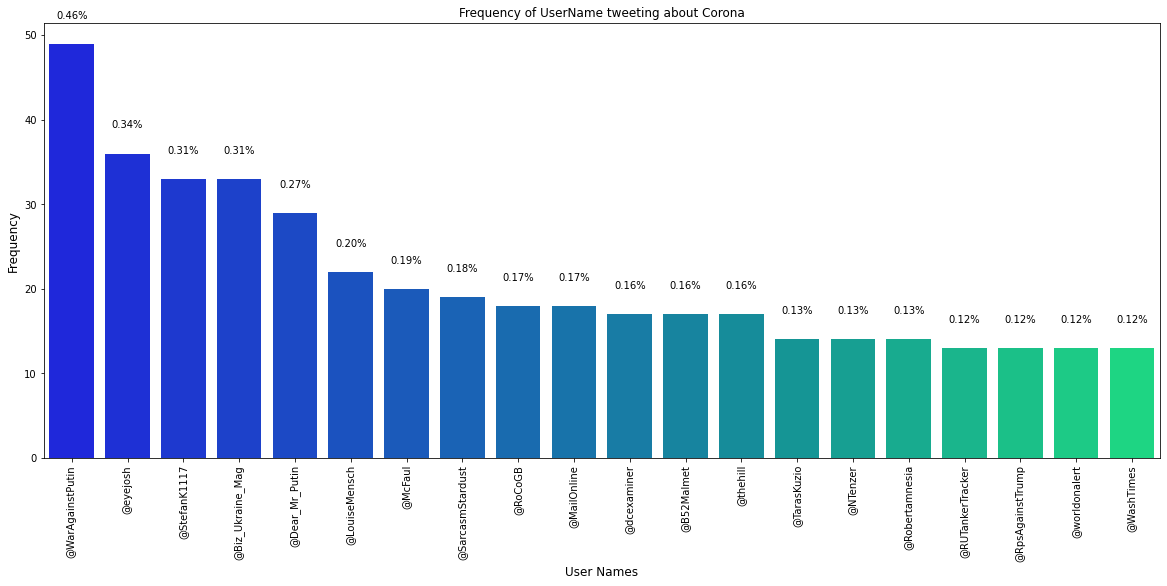

In [44]:
plot_frequency_charts(df_interim_p, 'UserName', 'User Names','winter')

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


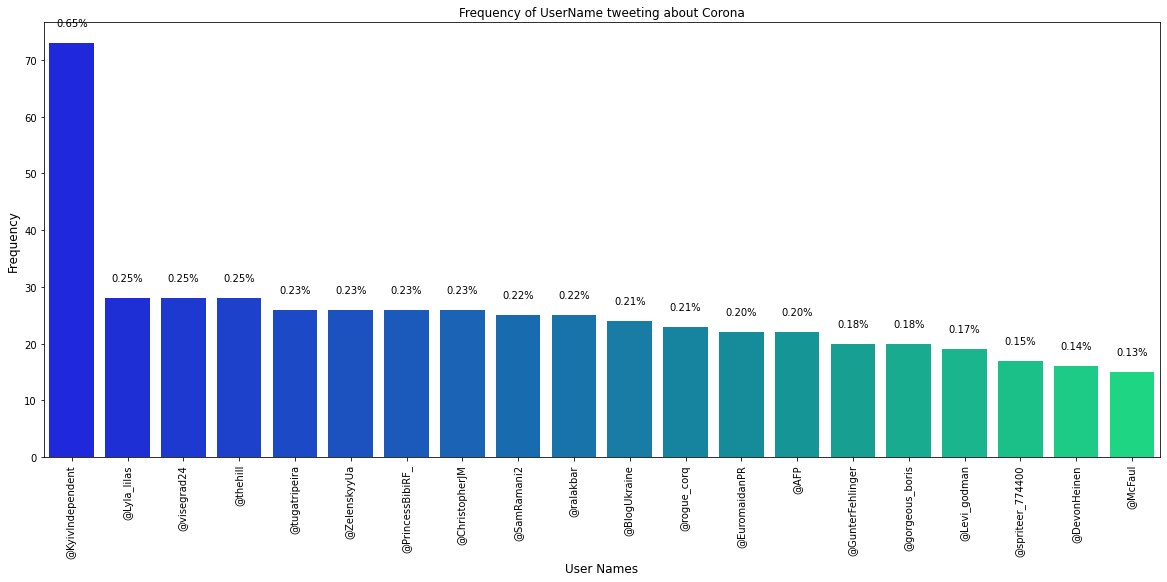

In [45]:
plot_frequency_charts(df_interim_z, 'UserName', 'User Names','winter')

Some of the tweets start with "Replying to" because they are responses to other tweets. We will create a new column to later analyze this data.

In [46]:
df_interim_p['Tweet'].str.startswith('Replying to').value_counts()

False    6812
True     3925
Name: Tweet, dtype: int64

In [47]:
df_interim_z['Tweet'].str.startswith('Replying to').value_counts()

True     6365
False    4805
Name: Tweet, dtype: int64

In [48]:
df_interim_p['Is_response'] = df_interim_p['Tweet'].apply(lambda x: 1 if x.startswith('Replying to') else 0)

In [49]:
df_interim_p['Is_response'].value_counts()

0    6812
1    3925
Name: Is_response, dtype: int64

In [50]:
df_interim_z['Is_response'] = df_interim_z['Tweet'].apply(lambda x: 1 if x.startswith('Replying to') else 0)

In [51]:
df_interim_z['Is_response'].value_counts()

1    6365
0    4805
Name: Is_response, dtype: int64

In [52]:
df_interim_p.sample(10)

,UserName,Timestamp,Tweet,Comments,Likes,Retweets,Tweet URL,Is_response
8325,@yashar,2022-06-16 23:42:42,"One of the most famous Russians in the world on Putin\n\n""Russians who speak out against him have a way of disappearing."" \n\n""I am 75 years old, what do I have to lose?""\n21\n85\n520",21,85,520,https://twitter.com/yashar/status/1537581465256374272,0
9135,@republic,2022-07-01 23:46:05,"Putin's staunch critic Alexey Navalny relays harrowing experiences from prison in Moscow\nrepublicworld.com\nPutin's staunch critic Alexey Navalny relays harrowing experiences from prison in Moscow\nIn a series of tweets, Navalny elaborated on difference between his likes and Russia's leader Putin and Dmitry Medvdev, the former Russian Prime Minister.\n2\n5",0,2,5,https://twitter.com/republic/status/1543018132742307840,0
1321,@worldonalert,2022-01-29 23:44:45,"Putin moves everything that he needs to invade and capture Ukraine to the border with Ukraine over 1,000s of kilometers during winter over months. Soldiers, tanks, APCs, howitzers, trucks, ballistic missiles, weapons, ammunition.\nRussian experts: Putin just wants talks. \n7\n28\n112",7,28,112,https://twitter.com/worldonalert/status/1487572455908646912,0
1857,@dwdavison,2022-02-09 22:51:30,"""WaPo is running ISIS back so we can't go there, come on people this is serious""\n""ok hear me out: what if Putin not doing a war is actually worse than if he did a war""\n""goddamn that's good, run it""\n2\n7\n68",2,7,68,https://twitter.com/dwdavison/status/1491545320752361472,0
10019,@MailOnline,2022-07-11 03:15:07,"Kremlin allies call for Vladimir Putin to be addressed as 'Our Ruler' rather than 'President Putin'\ndailymail.co.uk\nKremlin allies urge title change from President Putin to 'our ruler'\nThe Liberal Democratic Party (LDPR) has suggested the use of Pravitel, a Russian title, as it is more befitting of Putin's status and role.\n23\n27\n36",23,27,36,https://twitter.com/MailOnline/status/1546332228455743488,0
9813,@Ukraine66251776,2022-07-10 03:15:59,"Joe Biden will blame Putin\nQuote Tweet\nThe_Real_Fly\n@The_Real_Fly\n · Jul 10\nNATURAL GAS PLANT, OKLAHOMA\n0:07\n875.7K views\n25\n94\n333",25,94,333,https://twitter.com/Ukraine66251776/status/1545970059671117824,0
9773,@tveitdal,2022-07-09 16:21:40,Putin warns of ‘catastrophic’ energy crisis if west boosts sanctions via \n@FT\nRussian president says western countries risk inflicting more harm on themselves\nft.com\nPutin warns of ‘catastrophic’ energy crisis if west boosts sanctions\nRussian president says western countries risk inflicting more harm on themselves\n4\n14\n18,4,14,18,https://twitter.com/tveitdal/status/1545805393422696449,0
9046,@Hoi_Pollois,2022-06-30 23:43:54,"In Madrid at NATO sunlit, says Pres Biden of Putin:\n\n""He didn't get what he wanted. He wanted the Finlandization of NATO. He got the NATOization of Finland."" \n\nWith an 830-mile border w Russia, Finland has remained neutral.\n\nW Finland's joining NATO, Russia is surrounded.\n2\n5",0,2,5,https://twitter.com/Hoi_Pollois/status/1542655196890791944,0
2420,@coanchar,2022-02-19 23:38:18,"Replying to \n@B52Malmet\nWhy does the ""world"" not simply say, ""Go home Putin. If you cross the border we will crush you?""\n2\n1\n7",2,1,7,https://twitter.com/coanchar/status/1495180975155953667,1
8000,@TheRealNomics,2022-06-10 23:59:31,Prolly nothing #crashcycle #vixmaggedon #bondmaggedon #fertilizermaggedon #oilmaggedon #putin #foodcrisis #yourarehere\n10\n41\n96,10,41,96,https://twitter.com/TheRealNomics/status/1535411367116738560,0


In [53]:
df_interim_z.sample(10)

,UserName,Timestamp,Tweet,Comments,Likes,Retweets,Tweet URL,Is_response
1023,@batdorj911,2022-01-21 17:57:17,Replying to \n@ZelenskyyUa\n and \n@POTUS\nMr. President Zelensky. God bless Ukrainian people ! From Mongolia with proud !\n2\n4\n22,2,4,22,https://twitter.com/batdorj911/status/1484585908947283970,1
567,@MattBoxer94,2022-01-13 07:27:15,The sad truth is that even if Ted Cruz’s behavior was extremely immature and boneheaded there was no excuse to appease Putin on Nord Stream 2 when Zelensky is begging us to stop this. Also we shouldn’t help German naïveté abt Russia one bit and instead push them\nQuote Tweet\nWashington Post Opinions\n@PostOpinions\n · Jan 12\nFrom @JoshRogin: How Biden is working to save Vladimir Putin’s pipeline https://wapo.st/3Fmktqv\n2\n1,2,0,1,https://twitter.com/MattBoxer94/status/1481528251956838402,0
10827,@edu_vart,2022-07-14 23:43:13,"Zelensky calls on international community to recognize Russia as a ""terrorist state"" after Vinnytsia attack #Russiaisaterroriststate #Ukraine️ #Vinnytsia #UkraineRussiaWar #Russian \n \n (https://eduvart.blogspot.com/2022/07/zelensky-calls-on-international.html#ixzz7Z3rrvolG…)\n1",0,0,1,https://twitter.com/edu_vart/status/1547728455428481026,0
1886,@Baganwalia028,2022-02-06 13:00:36,Replying to \n@bsdhanoa\nHlo \n@WhiteHouse\n @JoeBiden\n why its taking to long to Russia to invade Ukraine?? It should not take that long. Your Poland preparation are not enough I think. You are more eager than \n@KremlinRussia_E\n for \n@ZelenskyyUa\n Ukraine's invasion.,0,0,0,https://twitter.com/Baganwalia028/status/1490309452507262979,1
8540,@Colinbythesea,2022-06-18 23:20:41,"Replying to \n@ezrandez\n @BorisJohnson\n and \n@ZelenskyyUa\nOne of the weirdest aspects of social media is peoples willingness to put out there the most overt ignorance I have ever seen. It’s quite astonishing, especially how proud people are that they haven’t a scooby. Congratulations \n14",0,0,14,https://twitter.com/Colinbythesea/status/1538300700685385728,1
5429,@visegrad24,2022-04-19 22:08:46,"President Zelensky claims Ukraine would have defeated Russia by now had the West granted all of Ukraine’s weapons requests.\n66\n284\n1,854",66,284,1854,https://twitter.com/visegrad24/status/1516539329274945536,0
7923,@L3DDY75,2022-06-06 21:40:29,"Replying to \n@wowanyname4now\n @ThomasWPenny\n and 4 others\nYou know Russia owns Boris right? I’d be more concerned about exactly what this self serving, lying, cheating, greedy, underhanded, profiteering cretin is getting out of this for himself, because this is certainly not his moral code or humanity in action. He has none.\n1\n7",1,0,7,https://twitter.com/L3DDY75/status/1533926826812268545,1
931,@InnaSovsun,2022-01-19 09:02:50,"Today, Secretary of State \n@SecBlinken\n is back in Kyiv.\nThis is another opportunity for \n@ZelenskyyUa\n to talk with US about new sanctions against #Russia and the provision of new weapons.\nThis is a new chance to persuade the #US to change its approach. Its loss will cost us dearly.\n8",0,0,8,https://twitter.com/InnaSovsun/status/1483726632930185221,0
4297,@BillyJo34773315,2022-03-27 23:58:22,Replying to \n@LunaFantom\n @carlosp202\n and 2 others\nHe's kicking a murderous imperialistic dictator to the floor. After this it will be a long time before Russia invades another country again. Assuming they don't collapse into multiple smaller countries due to the collapse of their economy. That's definitely a win for peace.\n1\n9,1,0,9,https://twitter.com/BillyJo34773315/status/1508231989064716288,1
5737,@BioAnnie2,2022-04-25 22:21:19,Replying to \n@GovHowardDean\n and \n@Michael24606562\nNope…we don’t run!\n\nStay and fight!\n\nThink \n@ZelenskyyUa\n & buck up!\n\n#IAmMyFathersDaughter & I don’t back down to oligarchs or fascism!\n#101stAB501stBastogne\n1\n2,0,1,2,https://twitter.com/BioAnnie2/status/1518716815043710982,1


## Preprocess the tweets.

In [54]:
#Remove symbols

def no_symbol(tweet):
    return re.sub("[^a-z0-9]"," ", tweet)

def repeated_words(tweet):
    return re.sub(r'\b(\w+)( \1\b)+', r'\1', tweet)

def remove_users(tweet):
    tweet = re.sub('(Replying to \s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove response info
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet
    
def no_num(tweet):
    return re.sub('([0-9]+)', '', tweet)

def double_space(tweet):
    return re.sub('\s+', ' ', tweet)

def no_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_quoted(tweet):
    tweet = re.sub(r'Quote Tweet.*', '', tweet) 
    return tweet
   


In [55]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [56]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [57]:
#Extract stopwords
def clean_stopwords(text: str,stop_dict: dict)->str:
    if text is not None:
        words = text.split()
        words_clean = []
        for word in words:
            if word not in stop_dict:
                words_clean.append(word)
        result = ' '.join(words_clean)
    else:
        result = None
    return result

In [58]:
def preprocess(df):
    
    #Create new column
    df['Clean_Tweet'] = df["Tweet"]

    # Expanding Contractions
    df['Clean_Tweet']=df['Clean_Tweet'].apply(lambda x:expand_contractions(x))

      #Remove mentions and replying info
    df['Clean_Tweet']=df['Clean_Tweet'].apply(remove_users)

    # Remove white spaces
    df['Clean_Tweet'] = df['Clean_Tweet'].str.strip()

    #Remove double spaces

    df['Clean_Tweet']=df['Clean_Tweet'].apply(double_space)

    #Remove quoted tweets

    df['Clean_Tweet']=df['Clean_Tweet'].apply(remove_quoted)

     #Remove links

    df['Clean_Tweet']=df['Clean_Tweet'].apply(no_links)

    
    #To lower case

    df['Clean_Tweet'] = df['Clean_Tweet'].str.lower()

    #Remove repeated words

    df['Clean_Tweet']=df['Clean_Tweet'].apply(repeated_words)

    #Remove non-alphanumeric characters

    df['Clean_Tweet']=df['Clean_Tweet'].apply(no_symbol)

    #Remove repeated letters

    df['Clean_Tweet']=df['Clean_Tweet'].str.replace(r"([a-zA-Z])\1{2,}",r"\1",regex=True)

    #Remove numbers
    
    df['Clean_Tweet']=df['Clean_Tweet'].apply(no_num)


    stop_dict = stopwords.words('english')
    df['Clean_Tweet']=df['Clean_Tweet'].apply(lambda x: clean_stopwords(x, stop_dict = stop_dict))
    df['Clean_Tweet']=df['Clean_Tweet'].str.replace(r'''['!,.]''', '', regex = True)



    return df
    


In [59]:
df_interim_p = preprocess(df_interim_p)

In [60]:
df_interim_p[['Tweet', 'Clean_Tweet']].sample(15, random_state=123)

,Tweet,Clean_Tweet
10112,"It’s not just Putin. There is a deep sickness in Russian society. They have failed every chance to become a civilized country and remain a gangster state that excels only in destruction, murder, oppression. Maybe there’s a path to change but until then they must be defeated.\nQuote Tweet\nMark Hertling\n@MarkHertling\n · Jul 12\nThe Russians are scum. twitter.com/visegrad24/sta…\n53\n277",putin deep sickness russian society failed every chance become civilized country remain gangster state excels destruction murder oppression maybe path change must defeated
3191,For everyone hating the Ukraine invasion but profiting off of it shame on you...you are feeding Putin with high oil prices we hurt him most when fuel was down\n3\n3\n9,everyone hating ukraine invasion profiting shame feeding putin high oil prices hurt fuel
628,"#TrumpRally \n\nDefeated 45 had 4 years to ""Make America Great Again"" and ""Save America""\n\nHe gave tax cuts to the rich\n\nHe wrote love letters to Kim Jong-un\n\nPutin played him like a fiddle\n\nHe was impeached twice\n\nHe incited & conspired an insurrection\n\nHE LOST BY 7 MILLION VOTES\n176\n913\n2,793",trumprally defeated years make america great save america gave tax cuts rich wrote love letters kim jong un putin played like fiddle impeached twice incited conspired insurrection lost million votes
1473,"Exactly! Putin/Russia stole Crimea (critical port), & now he's making his next move to expand their tentacles into to E Euro region (Ukraine borders 7 nations) & take over coastal area of Black Sea & Sea of Azov. Putin's a vulture like DJT who said Venezuela is ripe for US taking\nQuote Tweet\nKhashoggi’s Ghost\n@UROCKlive1\n · Feb 1\nDealing with Vladimir Putin is a lot like dealing with Republicans. It has to be done, but it's never a valid negotiation because none of them are ever acting in good faith.\n\nThey all lie. They all gaslight. They're all cheating. And they're all offended when you point this out.\n10\n16",exactly putin russia stole crimea critical port making next move expand tentacles e euro region ukraine borders nations take coastal area black sea sea azov putin vulture like djt said venezuela ripe us taking
372,"To Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\nstripes.com\nPutin dreams of a Russian 'sphere of influence.' Kazakhstan's protesters are the latest to push...\nTo Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\n3\n14\n19",russian president vladimir putin collapse soviet union greatest geopolitical catastrophe century stripes com putin dreams russian isphere influence kazakhstan protesters latest push russian president vladimir putin collapse soviet union greatest geopolitical catastrophe century
5332,"Replying to \n@ClintEhrlich\nThe more grotesquely indefensible his aggression becomes, the more baroque the apologetics of the Putin apologists get. We are in a fascinating race to the bottom.\n1\n2\n10",grotesquely indefensible aggression becomes baroque apologetics putin apologists get fascinating race bottom
6291,"It’s \n@ggreenwald\n GO PUTIN ! Greenwood.\nQuote Tweet\nGlenn Greenwald\n@ggreenwald\n · May 8\nI hope liberals are proud of their moral hero, the conscience of the nation, who weaponizes private conversations he claims to have had with someone's mother, then publicizes them to malign his critics.\n\nTransfer more of your cash to him to help defeat TRUMP! twitter.com/SteveSchmidtSE…\nShow this thread\n51\n171\n1,910",go putin greenwood
1509,"Not excusing Putin, who has his own reasons for threatening Ukraine, but isn't it interesting that America, safe from invasion, continually interferes in countries to its east, across the Atlantic, while many of its citizens don't even know where they are?\nft.com\nUkraine through the lens of history\nFormer ambassador Rodric Braithwaite

In [61]:
df_interim_z= preprocess(df_interim_z)

In [62]:
df_interim_z[['Tweet', 'Clean_Tweet']].sample(15, random_state=123)

,Tweet,Clean_Tweet
9942,"Replying to \n@BrotherNumpsay\n and \n@KyivIndependent\nFrom my readings about Ukraine, it seems like half the officeholders were loyal to Russia or being paid by Russia for Ukrainian intel, even top people in its secret service. I think the US is giving Zelensky the dirt that they have on his people.\n5\n22\n421",readings ukraine seems like half officeholders loyal russia paid russia ukrainian intel even top people secret service think us giving zelensky dirt people
9396,Replying to \n@Roj0Santo\n @gabrielboric\n and \n@ZelenskyyUa\nCandy candy? Por lo meretriz? \n1\n5,candy por lo meretriz
1976,Replying to \n@Aliaktann07\n @ZelenskyyUa\n and \n@EmmanuelMacron\nHe is not our friend.\n1\n2,friend
7067,"Replying to \n@ZelenskyyUa\n and \n@POTUS\nThank you both for showing up for the civilians whose lives are ruined by Putin’s disgusting violent grab for power & land. It’s not just you, it’s the world he’s after & we see him for what he is. #VladTheToxic #SlavaUkraini I my cousins are safe. \n1",thank showing civilians whose lives ruined putin disgusting violent grab power land world see vladthetoxic slavaukraini cousins safe
7412,"Replying to \n@BorisJohnson\n and \n@ZelenskyyUa\nAlthough it’s horrible what is happening in Ukraine. You do realise that, by selling arms to Ukraine, the U.K will be targeted.\n\nPutin has threatened the U.K, Johnson. Saying if you interfere, the U.K will see nuclear missiles.\n4\n4",although horrible happening ukraine realise selling arms ukraine u k targeted putin threatened u k johnson saying interfere u k see nuclear missiles
9162,"Good for Oz. Seems they are probably exceeding the cowardly, appeasing #Germany in their efforts.\n@ZelenskyyUa\n @BorisJohnson\n @MorawieckiM\n @vonderleyen\n @ellymelly\n @IngridaSimonyte\nQuote Tweet\nDefence of Ukraine\n@DefenceU\nUkraine government organization\n · Jun 29\nAustralia has become a major non-NATO supplier of military aid to Ukraine. is so far from , yet is one our closest partners! Our nations share a love of freedom and respect for the environment. Your weapons will help us with pest control of our fields. Thank you!\n0:46\n274.6K views\n2\n3",good oz seems probably exceeding cowardly appeasing germany efforts
10614,Replying to \n@DashDobrofsky\n @sandkey211\n and \n@BetoORourke\nAbbott and Cruz are Texas' Putin and Medvedev. O'Rourke is Texas' Zelensky ! Both O'Rourke and Zelensky have the balls to defend democracy and their fellow citizens. And they will win !\n1\n16\n35,abbott cruz texas putin medvedev rourke texas zelensky rourke zelensky balls defend democracy fellow citizens win
6984,"Replying to \n@BorisJohnson\n and \n@ZelenskyyUa\nTo be considered seriously as a politician of international standing- a statesman - it would first be essential to be taken seriously, respected, if not agreed-with, by a majority of people in your own country. This is not something for which you are remotely equipped.\n6",considered seriously politician international standing statesman would first essential taken seriously respected agreed majority people country something remotely equipped
5729,"Apparently this guy is the zelensky of Somalia, with \n@KFosterFCDO\n directly supporting his campaign n pushing for a regime change, and James swan interviewing potential speakers of Parliament who could pave for Dani takeover.\n6\n13\n51",apparently guy zelensky somalia directly supporting campaign n pushing regime change james swan interviewing potential speakers parliament could pave dani takeover
10809,Replying to \n@OlenaHalushka\nWhat you wanna bet that 2M people are Russian and weren't forced to go anywhere but moved to Russia to get away from Zelensky's artillery shells?\n10\n4\n124,wanna bet people russian forced go anywhere moved russia get away zelensky artillery shells


In [63]:
df_interim_p.to_csv('../data/interim/Putin_tweets.csv', index=False)

In [64]:
df_interim_z.to_csv('../data/interim/Zelensky_tweets.csv', index=False)

In [65]:
#Common words

df_interim_p['Clean_Tweet'].str.split(expand = True).stack().value_counts()[:10]

putin        13058
ukraine       4188
russia        3070
russian       2402
war           2025
com           1461
trump         1248
vladimir      1242
president     1122
would         1120
dtype: int64

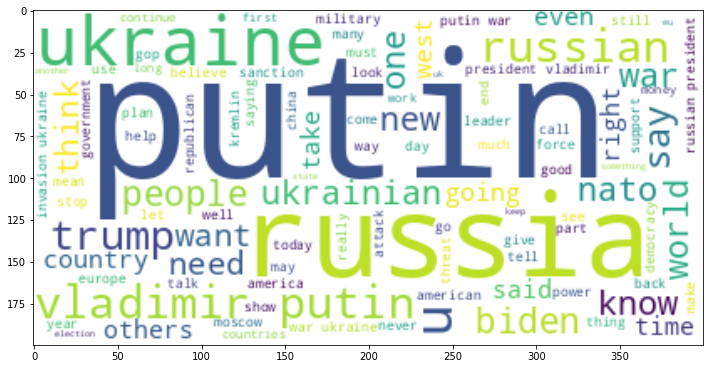

In [66]:
text = ' '.join(i for i in df_interim_p.Clean_Tweet)
wordcloud = WordCloud(max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

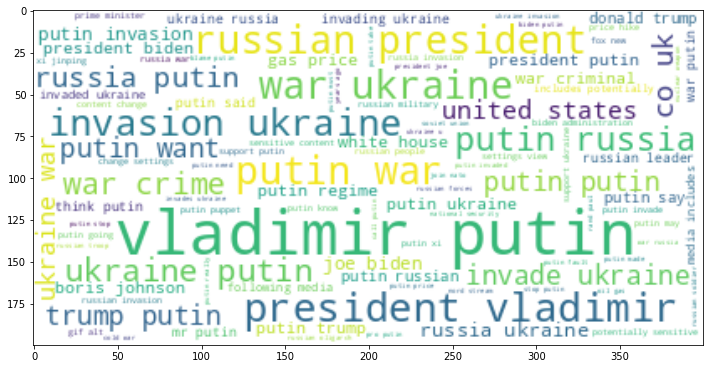

In [67]:
wordcloud_bg = WordCloud(collocation_threshold = 2, collocations = True, max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud_bg, interpolation = 'bilinear')
plt.show()

In [68]:
#Common words

df_interim_z['Clean_Tweet'].str.split(expand = True).stack().value_counts()[:10]

ukraine      5190
zelensky     4924
president    2381
russia       2139
others       1953
ukrainian    1564
war          1422
russian      1381
putin        1332
people       1069
dtype: int64

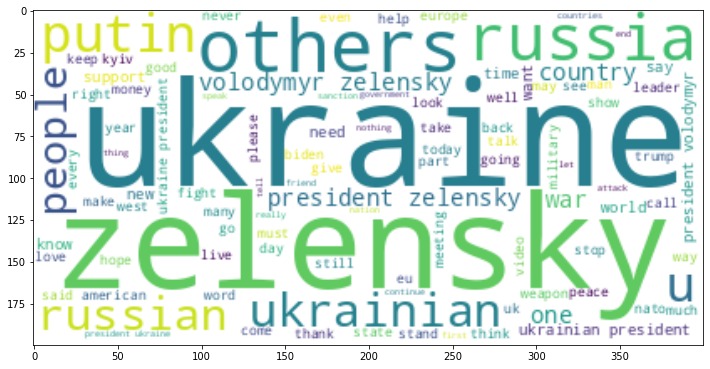

In [69]:
text = ' '.join(i for i in df_interim_z.Clean_Tweet)
wordcloud = WordCloud(max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()


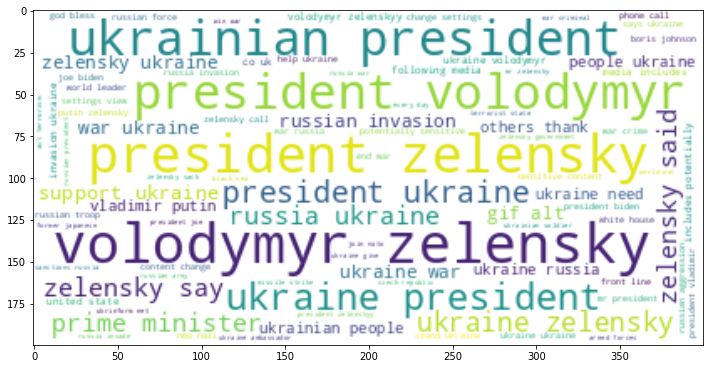

In [70]:
wordcloud_bg = WordCloud(collocation_threshold = 2, collocations = True, max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud_bg, interpolation = 'bilinear')
plt.show()

In [71]:
# common words
common_words = ['vladimir', 'putin', 'volodymyr', 'zelensky', 'russia', 'russian', 'ukraine', 'ukrainian'] 


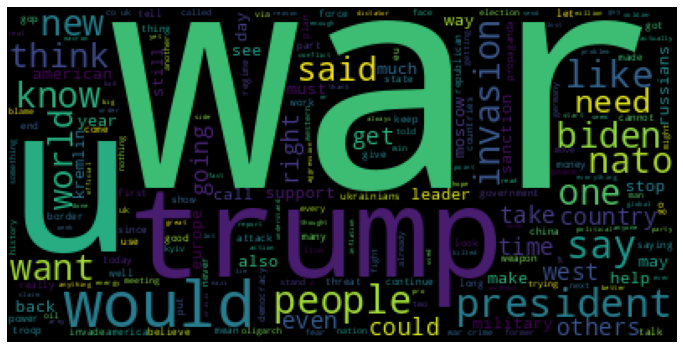

In [72]:
wordcloud = WordCloud(stopwords=common_words).generate(' '.join(i for i in df_interim_p.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

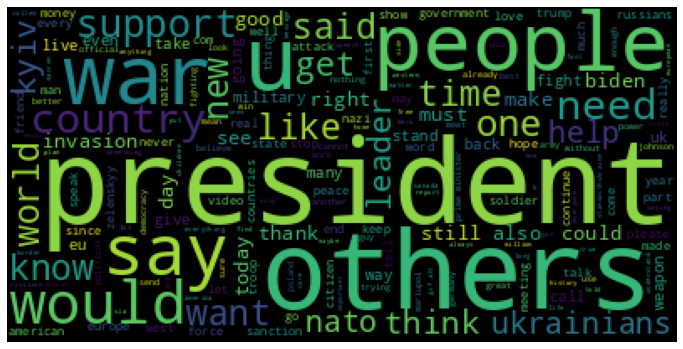

In [73]:
wordcloud = WordCloud(stopwords=common_words).generate(' '.join(i for i in df_interim_z.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [74]:
df_interim_p.shape

(10737, 9)

In [75]:
putin_in_zelenzky = df_interim_z['Clean_Tweet'].apply(lambda x: True if 'putin' in x else False)

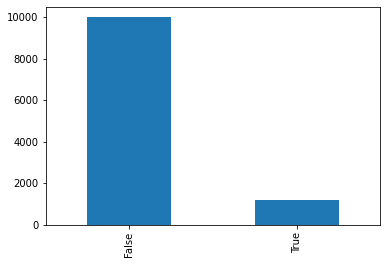

In [76]:
putin_in_zelenzky.value_counts().plot.bar()
plt.show()

In [77]:
zelenzky_in_putin = df_interim_p['Clean_Tweet'].apply(lambda x: True if 'zelensky' in x else False)

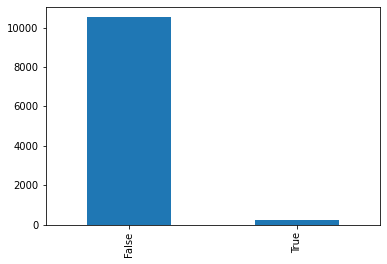

In [78]:
zelenzky_in_putin.value_counts().plot.bar()
plt.show()

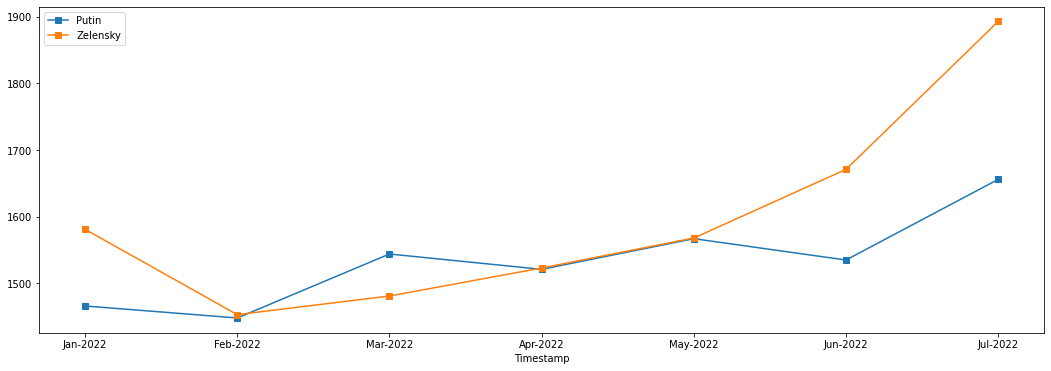

In [79]:
plt.figure(figsize=(18,6))
df_interim_p.groupby(pd.to_datetime(df_interim_p['Timestamp']).dt.strftime('%b-%Y'), sort=False)['Clean_Tweet'].size().plot(label= 'Putin', marker = 's')
df_interim_z.groupby(pd.to_datetime(df_interim_z['Timestamp']).dt.strftime('%b-%Y'), sort=False)['Clean_Tweet'].size().plot(label= 'Zelensky', marker = 's')
plt.legend()
plt.show()

In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/gitpod/nltk_data...


True

In [108]:
df_labels = df_interim_p.copy()
df_labels = df_labels[['Clean_Tweet']]

In [109]:
sentiments = SentimentIntensityAnalyzer()
df_labels["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_labels["Clean_Tweet"]]
df_labels["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_labels["Clean_Tweet"]]
df_labels["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_labels["Clean_Tweet"]]
df_labels['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df_labels["Clean_Tweet"]]
df_labels.head()

,Clean_Tweet,Positive,Negative,Neutral,Compound
0,halt russian aggression day shipping atgms syrian rebels ukraine poland finland anyone else wants send wire guided fuck putin,0.000,0.319,0.681,-0.7579
1,putin ciao,0.000,0.000,1.000,0.0000
2,looks like lumpy meeting putin,0.385,0.000,0.615,0.3612
3,kind country honours war criminals like blair imprisons man publishing evidence war crimes like assange putin russia xi china repressive tinpot country uk,0.286,0.343,0.370,-0.5106
4,time putin tribunal,0.000,0.000,1.000,0.0000


In [110]:
score = df_labels["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df_labels["Sentiment"] = sentiment

,Clean_Tweet,Positive,Negative,Neutral,Compound,Sentiment
7204,afraid germany would go save putin face constantly hold equipment ukraine partners maybe would go like sabotaging rammstein something like,0.325,0.000,0.675,0.8020,Positive
4556,want putin getting chance capture latest tech probably much better russian atgms want putin find,0.405,0.000,0.595,0.6705,Positive
2413,wish photo higher resolution could assess approximate value watch putin lovely watches btw,0.471,0.000,0.529,0.8360,Positive
4489,fascinating longread finding common traits strongmen putin modi xi bolsonaro orban ft com war ukraine means age autocrat world strongmen watching vladimir putin gamble play ukraine consequences success failure global,0.294,0.168,0.537,0.5267,Positive
7433,crime ukrainian france germany think happen ukrainian people putin wins war every ukrainian victim,0.159,0.409,0.431,-0.7003,Negative
387,positive side ukraine russia tensions least putin giving ukraine heads time around unlike,0.321,0.144,0.535,0.5106,Positive
5502,recommend look research nailed far putin got plan keep posting recommended booklist incl yockey,0.264,0.000,0.736,0.5106,Positive
8950,boris johnson claims putin would invaded ukraine woman theguardian com boris johnson putin would invaded ukraine woman prime minister says russian president gender contributory factor ukraine invasion,0.000,0.000,1.000,0.0000,Neutral
1973,putin get domestic approval without saber rattling challenge,0.300,0.118,0.581,0.4363,Positive
2787,vladimir putin war criminal plain simple alexander lukashenko aiding abetting war criminal sanctions leveled russian putin need apply belarus lukashenko,0.000,0.477,0.523,-0.9393,Negative


In [123]:
df_labels2.sample(10, random_state=123)

,Clean_Tweet,Polarity,Sentiment_Type
10112,putin deep sickness russian society failed every chance become civilized country remain gangster state excels destruction murder oppression maybe path change must defeated,-0.025000,NEGATIVE
3191,everyone hating ukraine invasion profiting shame feeding putin high oil prices hurt fuel,0.160000,POSITIVE
628,trumprally defeated years make america great save america gave tax cuts rich wrote love letters kim jong un putin played like fiddle impeached twice incited conspired insurrection lost million votes,0.558333,POSITIVE
1473,exactly putin russia stole crimea critical port making next move expand tentacles e euro region ukraine borders nations take coastal area black sea sea azov putin vulture like djt said venezuela ripe us taking,0.020833,POSITIVE
372,russian president vladimir putin collapse soviet union greatest geopolitical catastrophe century stripes com putin dreams russian isphere influence kazakhstan protesters latest push russian president vladimir putin collapse soviet union greatest geopolitical catastrophe century,0.416667,POSITIVE
5332,grotesquely indefensible aggression becomes baroque apologetics putin apologists get fascinating race bottom,0.075000,POSITIVE
6291,go putin greenwood,0.000000,NEUTRAL
1509,excusing putin reasons threatening ukraine interesting america safe invasion continually interferes countries east across atlantic many citizens even know ft com ukraine lens history former ambassador rodric braithwaite looks two new books post cold war period argues present conflict inevitable,0.129545,POSITIVE
9276,putin work,0.000000,NEUTRAL
2280,vladimir putin mahmoud ahmadinejad pierre poilievre walk bar,0.000000,NEUTRAL


In [111]:
df_labels[df_labels['Sentiment'] == 'Positive']


,Clean_Tweet,Positive,Negative,Neutral,Compound,Sentiment
2,looks like lumpy meeting putin,0.385,0.000,0.615,0.3612,Positive
11,thehateyam called generals morons called troops suckersandlosers permitted russianbounty lives soldiers without even objection trumpisarussianasset obama looked putin like american president like poo shoe,0.177,0.081,0.742,0.4019,Positive
13,xi jinping congratulates putin new year praises china relations russia tass com xi jinping congratulates putin new year praises china relations russia recalled putin visit china attend opening winter olympics beijing,0.190,0.000,0.810,0.7783,Positive
18,next twitter conflicts interest latest right wing putin loving tinfoil hat conspiracy theory fact checkers ties vaccine companies say,0.247,0.215,0.538,0.2263,Positive
19,also saw former president ukraine tried use ukraine tried use purposes mr putin understood allowed trail along hope maybe mr trump would return presidency,0.112,0.000,0.888,0.4404,Positive
...,...,...,...,...,...,...
10724,thank hugely positive review putin learn defence stalingrad telegraph co uk putin learn defence stalingrad iain macgregor lighthouse stalingrad uncovers fresh evidence staggering feat endurance military history,0.343,0.000,0.657,0.8588,Positive
10726,rooster polite reminder asking behalf wilma dogs tx pledge payments please would able check records appreciate notifications easily missed,0.379,0.084,0.536,0.7717,Positive
10732,polite reminder asking behalf wilma dogs tx pledge payments please would able check records appreciate notifications easily missed ty rsvp,0.436,0.077,0.488,0.8519,Positive
10734,heard whales must true freethewizard freeassange caitlinjohnstone com wizard julian multimedia piece made assange th birthday inspired report keeping spirits feeding pair mallards nesting belmarsh window,0.200,0.000,0.800,0.7184,Positive


In [112]:
print(df_labels["Sentiment"].value_counts())

Negative    5301
Positive    3880
Neutral     1556
Name: Sentiment, dtype: int64


In [114]:
!pip install TextBlob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 11.5 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [115]:
from textblob import TextBlob

In [118]:
df_labels2 = df_interim_p.copy()
df_labels2 = df_labels[['Clean_Tweet']]
df_labels2['Clean_Tweet'] = df_labels2['Clean_Tweet'].astype('str')

/tmp/ipykernel_1703/1671134570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels2['Clean_Tweet'] = df_labels2['Clean_Tweet'].astype('str')


In [119]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df_labels2['Polarity'] = df_labels2['Clean_Tweet'].apply(get_polarity)

/tmp/ipykernel_1703/1823064002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels2['Polarity'] = df_labels2['Clean_Tweet'].apply(get_polarity)


In [120]:
df_labels2['Sentiment_Type']=''
df_labels2.loc[df_labels2.Polarity>0,'Sentiment_Type']='POSITIVE'
df_labels2.loc[df_labels2.Polarity==0,'Sentiment_Type']='NEUTRAL'
df_labels2.loc[df_labels2.Polarity<0,'Sentiment_Type']='NEGATIVE'

/tmp/ipykernel_1703/3898706950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels2['Sentiment_Type']=''


In [122]:
df_labels2.sample(10, random_state=123)

,Clean_Tweet,Polarity,Sentiment_Type
10112,putin deep sickness russian society failed every chance become civilized country remain gangster state excels destruction murder oppression maybe path change must defeated,-0.025000,NEGATIVE
3191,everyone hating ukraine invasion profiting shame feeding putin high oil prices hurt fuel,0.160000,POSITIVE
628,trumprally defeated years make america great save america gave tax cuts rich wrote love letters kim jong un putin played like fiddle impeached twice incited conspired insurrection lost million votes,0.558333,POSITIVE
1473,exactly putin russia stole crimea critical port making next move expand tentacles e euro region ukraine borders nations take coastal area black sea sea azov putin vulture like djt said venezuela ripe us taking,0.020833,POSITIVE
372,russian president vladimir putin collapse soviet union greatest geopolitical catastrophe century stripes com putin dreams russian isphere influence kazakhstan protesters latest push russian president vladimir putin collapse soviet union greatest geopolitical catastrophe century,0.416667,POSITIVE
5332,grotesquely indefensible aggression becomes baroque apologetics putin apologists get fascinating race bottom,0.075000,POSITIVE
6291,go putin greenwood,0.000000,NEUTRAL
1509,excusing putin reasons threatening ukraine interesting america safe invasion continually interferes countries east across atlantic many citizens even know ft com ukraine lens history former ambassador rodric braithwaite looks two new books post cold war period argues present conflict inevitable,0.129545,POSITIVE
9276,putin work,0.000000,NEUTRAL
2280,vladimir putin mahmoud ahmadinejad pierre poilievre walk bar,0.000000,NEUTRAL


In [124]:
print(df_labels2["Sentiment_Type"].value_counts())

POSITIVE    4614
NEGATIVE    3124
NEUTRAL     2999
Name: Sentiment_Type, dtype: int64


In [126]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 kB 8.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 26.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 39.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.7 MB/s eta 0

In [147]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-08-22 23:00:07,924 loading file /home/gitpod/.flair/models/sentiment-en-mix-distillbert_4.pt


In [155]:
probs = []
sentiments = []

In [171]:
df_labels['Clean_Tweet'].to_list()

['halt russian aggression day shipping atgms syrian rebels ukraine poland finland anyone else wants send wire guided fuck putin',
 'putin ciao',
 'looks like lumpy meeting putin',
 'kind country honours war criminals like blair imprisons man publishing evidence war crimes like assange putin russia xi china repressive tinpot country uk',
 'time putin tribunal',
 'putin new president italy',
 'go live kremlin putin newyear speech speech last year russia siege bla bla fault wicked west fault bla bla nato bla bla got lots rockets fuck else helmet big',
 'clear message finland takes threats putin',
 'putin saber rattling nato enlargement may lead nato enlargement',
 'enjoyed complained fireworks last night putin dropped bombs syrian refugee camp killed mutilated syrian children newyear',
 'way end periodic crises created putin nato invite sweden finland ukraine georgia map membership perspective nato arrange group discount pay anger management classes putin kremlin sycophants',
 'thehateyam

In [174]:
df_label3= df_label.loc[0:10,:]

In [173]:
sentiment = []
confidence = []

for sentence in df_label['Clean_Tweet']:
	if sentence.strip() == "":
		sentiment.append("")
		confidence.append("")
	else:
		sample = flair.data.Sentence(sentence)
		sentiment_model.predict(sample)

		sentiment.append(sample.labels[0].value)
		confidence.append(sample.labels[0].score)

In [175]:
df_label['sentiment'] = sentiment
df_label['confidence'] = confidence

In [178]:
df_label[['Clean_Tweet', 'sentiment', 'confidence']].sample(10)

,Clean_Tweet,sentiment,confidence
1766,biden made assessment putin ability invade ukraine monday stated word word know position able invade almost assuming ground frozen kyiv capacity read defconlevel com european command news eucom useucom alerts europe european command news eucom useucom alerts europe,NEGATIVE,0.990523
7611,russian soldiers fight unjust war die putin stay power end putin end war misery,NEGATIVE,0.98605
6199,israel strongly condemning putin slaughter ukrainians,NEGATIVE,0.997784
4110,fossil fuel industry aka koch family et al need compromised operators across us government position power countries trump thomas america putin mbs overseas,NEGATIVE,0.553189
9836,good research daily mail general pavel came retirement putin ran generals pavel general ivan turchin long retired border guard served border uzbekistan fake worked dm moved another,NEGATIVE,0.993738
7402,ukraine pushes back putin nato fulcrum strategic containment russia shift axis along estonia latvia lithuania poland ukraine primarily carry mantle front line state bulwark burden big blow unique franco german vanity,NEGATIVE,0.80465
3864,putin trumpy rally man feels operating position strength ukraine putinswar,POSITIVE,0.986585
9122,know takes money putin putin almost certainly holds kompromat,NEGATIVE,0.864221
7271,abbott slashed metal health budget texas million eased gun restrictions work putin,NEGATIVE,0.88325
1967,republican ever say damn thing weakness regard russia supporting putin puppet donald trump gop government putin kremlingop gopbetrayedamerica,NEGATIVE,0.990222


In [180]:
print(df_label["sentiment"].value_counts())

NEGATIVE    8961
POSITIVE    1775
               1
Name: sentiment, dtype: int64


In [188]:
df_interim_z.shape

(11170, 9)

In [189]:
df_label_4z= df_interim_z.copy()

In [192]:
df_label_4z.shape

(11170, 9)

In [194]:
sentiment = []
confidence = []

for sentence in df_label_4z['Clean_Tweet']:
	if sentence.strip() == "":
		sentiment.append("")
		confidence.append("")
	else:
		sample = flair.data.Sentence(sentence)
		sentiment_model.predict(sample)

		sentiment.append(sample.labels[0].value)
		confidence.append(sample.labels[0].score)

In [196]:
df_label_4z['sentiment'] = sentiment
df_label_4z['confidence'] = confidence

In [198]:
df_label_4z[['Clean_Tweet', 'sentiment', 'confidence']].sample(10)

,Clean_Tweet,sentiment,confidence
2240,zelensky walkback anything nbc news simply misinterpreted misreported original statement reacting reports us february saying ukrainian government thinks russia attack day,NEGATIVE,0.998362
765,others yeah ok including know pure bullshit,NEGATIVE,0.983145
6381,seems like creative positive thoughts worked announced wounded medics evacuated hope finds way resupply guys staying take best medics may still needed,POSITIVE,0.976649
7187,zelensky great deal time extraordinary strength required thwart russia advantage weapons equipment president zelensky said address russia thrown strength left attacking donbas want destroy everything,POSITIVE,0.82699
2795,instagram post ukraine president zelensky said family remain ukraine despite russia targets zelensky says intel russian sabotage groups entered capital kyiv begs ukrainians careful obey curfew rules,NEGATIVE,0.998028
7960,extraordinary courage guys ballsofsteel wish positive outcome brave pilots defenders avostal savemariupol savemariupoldefenders aob azovbattalion world must forget must brought home,POSITIVE,0.997711
8756,would great gif alt,POSITIVE,0.984535
2232,past minutes cnn heard zaporizhzhia mispronounced zaporizhifhfkenfknefn anchor say skies eastern ukraine seem empty since mh shot zelensky national address misinterpreted great,NEGATIVE,0.988163
2390,one ukrainian president volodymyr zelensky closest allies slammed western legacy media reports imminent russian invasion obviously fake news actually served harm ukraine summit news ukraine ally says western media reports russian attack obviously fake news says cnn worse russian propaganda,NEGATIVE,0.999519
4106,others know,POSITIVE,0.875543


In [200]:
print(df_label_4z["sentiment"].value_counts())

NEGATIVE    7292
POSITIVE    3859
              19
Name: sentiment, dtype: int64


In [202]:
df_label_4z[df_label_4z['sentiment']==''].sample(10)

,UserName,Timestamp,Tweet,Comments,Likes,Retweets,Tweet URL,Is_response,Clean_Tweet,sentiment,confidence
782,@shvydkoplynnyi,2022-01-16 19:49:17,Replying to \n@AndersFoghR\n and \n@poroshenko\nDo you \n@ZelenskyyUa\n ?\n1,0,0,1,https://twitter.com/shvydkoplynnyi/status/1482802153819418638,1,,,
6230,@PenitentDeadMa2,2022-05-04 21:33:43,Replying to \n@Singbomb\n @ZelenskyyUa\n and \n@naftalibennett\nNo it isn't.\n16,0,0,16,https://twitter.com/PenitentDeadMa2/status/1521966324586536960,1,,,
5703,@Laighe,2022-04-24 22:28:32,Replying to \n@BettyBowers\n @ZelenskyyUa\n and \n@EmmanuelMacron\nAs am I.\n2\n72,2,0,72,https://twitter.com/Laighe/status/1518356244171563009,1,,,
8081,@nisheink,2022-06-09 22:24:23,Replying to \n@ZelenskyyUa\n and \n@EmmanuelMacron\nFrom with \nQuote Tweet\nEuromaidan Press\n@EuromaidanPress\n · Jun 7\nUkrainian crews of 6 Caesar howitzers destroyed >80 Russian artillery units - France24\n\nThe Ukrainian men were trained to use them a month ago at a military base in South of France. https://francetvinfo.fr/monde/europe/manifestations-en-ukraine/guerre-en-ukraine-des-artilleurs-ukrainiens-utilisent-des-armes-francaises_5180191.html…\n1\n1\n6,1,1,6,https://twitter.com/nisheink/status/1535025040357482496,1,,,
3091,@CyndiW100,2022-03-02 23:54:19,Replying to \n@ZelenskyyUa\n and \n@JustinTrudeau\nWe're on it!!!!\n1\n33,1,0,33,https://twitter.com/CyndiW100/status/1499171272504197123,1,,,
9104,@AldemiraVeiga,2022-06-28 21:06:11,Replying to \n@Gerashchenko_en\n and \n@ZelenskyyUa\nIt is\n1\n9,0,1,9,https://twitter.com/AldemiraVeiga/status/1541890728581791744,1,,,
667,@Alexxa1721,2022-01-15 00:01:38,Replying to \n@Reuters\n@ZelenskyyUa\n should have been there,0,0,0,https://twitter.com/Alexxa1721/status/1482140884070277120,1,,,
9227,@WillAustin1964,2022-06-30 23:34:35,Replying to \n@BorisJohnson\n and \n@ZelenskyyUa\nThis you?\n6,0,0,6,https://twitter.com/WillAustin1964/status/1542652849628368896,1,,,
8895,@gascoignep,2022-06-24 18:22:49,"Replying to \n@AlStewartOBE\n @ZelenskyyUa\n and \n@glastonbury\nNo, it’s not.\n38",0,0,38,https://twitter.com/gascoignep/status/1540400065138794503,1,,,
2226,@djandbjk,2022-02-13 21:01:36,Replying to \n@ZelenskyyUa\n @POTUS\n and \n@JoeBiden\n is with \n5,0,0,5,https://twitter.com/djandbjk/status/1492967215653695495,1,,,
